## 빅데이터 활용 AI 설계
# 강화학습 : catch 게임

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygame
import collections

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
from scipy.misc import imresize

In [3]:
pygame.init()

COLOR_WHITE = (255,255,255)
COLOR_BALCK = (0,0,0)

font = pygame.font.SysFont('Comic Sans MS', 30)

In [4]:
def step(action):
    game_over = False
    reward = 0

    global paddle_x, ball_x, ball_y, num_tries, game_score

    pygame.event.pump()

    paddle_x += (action-1)*paddle_velocity
    if paddle_x < 0:
        paddle_x = paddle_velocity
    if paddle_x > 400-50:
        paddle_x = 400-50-paddle_velocity

    screen.fill(COLOR_BALCK)

    '''score_text = font.render('Score: %d, Ball: %d' % (game_score, num_tries),  True, COLOR_WHITE)
    screen.blit(score_text, (200-score_text.get_width()//2, 350+15))'''

    ball_y += ball_velocity
    ball = pygame.draw.rect(screen, COLOR_WHITE, pygame.Rect(ball_x, ball_y, 20, 20))
    paddle = pygame.draw.rect(screen, COLOR_WHITE, pygame.Rect(paddle_x, 350, 50, 10))

    if ball_y >= 340:
        reward = 1 if ball.colliderect(paddle) else -1
        game_score += reward

        ball_x = np.random.randint(400-20)
        ball_y = 10

        num_tries += 1
        game_over=True
        #print(num_tries, game_score)

    pygame.display.flip()

    frame = pygame.surfarray.array2d(screen)
    clock.tick(30)

    return frame, reward, game_over

In [7]:
num_wins = 0
experience = collections.deque(maxlen=50000)

for epoch in range(5):
    # game reset
    frames = collections.deque(maxlen=4)
    
    paddle_x = 200
    ball_x = np.random.randint(400-20)
    ball_y = 0 # ceiling
    paddle_velocity = 20
    ball_velocity = 10
    
    num_tries = 0
    game_score = 0
    game_over = False
    first_frame = True

    screen = pygame.display.set_mode((400,400))
    clock = pygame.time.Clock()
    
    # game restart
    while not game_over:
        if not first_frame:
            s_tm1 = s_t
        
        a_t = np.random.choice([0,1,2]) # 0: left, 1: stay, 2: right
        
        frame, r_t, game_over = step(a_t)
        
        img = (imresize(frame, [80,80]).astype('float'))/255.
        if len(frames)==0:
            for i in range(4): frames.append(img)
        else:
            frames.append(img)
        
        s_t = np.moveaxis(np.array(frames), 0, 2) # (4,80,80) -> (80,80,4)
        s_t = np.expand_dims(s_t, axis=0) # (1,80,80,4)
        
        if first_frame==True:
            first_frame=False
        else:
            experience.append([s_tm1, a_t, r_t, s_t, game_over])

C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


In [8]:
pygame.quit()

In [106]:
np.save('catch.npy', list(experience))

### 게임 이력 확인

In [13]:
es = list(experience)
len(es), es[0][0].shape

(165, (1, 80, 80, 4))

In [14]:
for i in range(32,165,33):
    print(es[i][2])

-1
-1
1
-1
-1


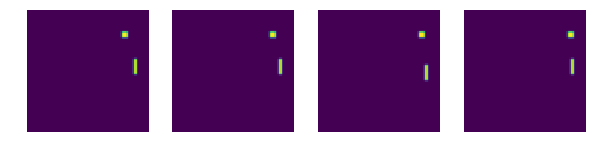

In [17]:
plt.figure(figsize=[10,3])
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(es[-1][3][0,:,:,i])
    plt.axis('off')